In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Image Shape (1226, 370)

Epipolar line 1 [-2.00187697e-03  2.45203515e-04  9.85412202e-01]

Epipolar line 2 [ 0.00143141 -0.00433173  0.99113045]

points on epipolar line 1 [(492, -1), (496, 30), (500, 63), (504, 95), (508, 128), (512, 161), (516, 193), (520, 226), (524, 259), (528, 291), (532, 324)]

points on epipolar line 2 [(0, 228), (42, 242), (84, 256), (126, 270), (168, 284), (210, 298), (252, 312), (294, 325), (336, 339), (378, 353), (420, 367)]

points on epipolar line 1 which lie on image [(496, 30), (500, 63), (504, 95), (508, 128), (512, 161), (516, 193), (520, 226), (524, 259), (528, 291), (532, 324)]

points on epipolar line 2 which lie on image [(0, 228), (42, 242), (84, 256), (126, 270), (168, 284), (210, 298), (252, 312), (294, 325), (336, 339), (378, 353), (420, 367)]



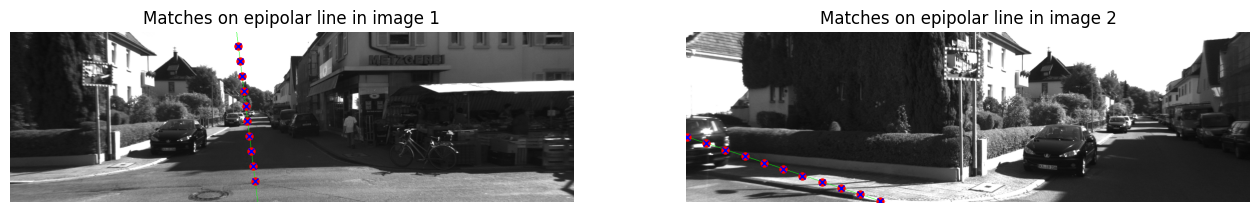

In [2]:
image1 = cv2.imread('/kaggle/input/cvassign1/Question 2 and 3 Images-20240326T173035Z-001/Question 2 and 3 Images/000000.png')
image2 = cv2.imread('/kaggle/input/cvassign1/Question 2 and 3 Images-20240326T173035Z-001/Question 2 and 3 Images/000023.png')

F=np.array([[3.34638533e-07,  7.58547151e-06, -2.04147752e-03],
   [-5.83765868e-06,  1.36498636e-06, 2.67566877e-04],
   [1.45892349e-03, -4.37648316e-03,  1.00000000e+00]])

def compute_epipolar_lines(F_matrix, point):
    x, y = point[0], point[1]
    line = np.dot(F_matrix, [x, y, 1])
    return line

def plot_epipolar_lines(image1, image2, epipolar_line1, epipolar_line2, 
                         points_on_epipolar_line1, points_on_epipolar_line2, 
                         corresponding_points_on_epipolar_line1, corresponding_points_on_epipolar_line2):
    
    def draw_epipolar_lines(image, lines):
        for line in lines:
            x0 = 0
            y0 = int(-line[2] / line[1])
            x1 = image.shape[1]
            y1 = int((-line[2] - line[0] * x1) / line[1])
            image = cv2.line(image, (x0, y0), (x1, y1), (0, 255, 0), 1)
        return image

    plt.figure(figsize=(16, 8))

    plt.subplot(1, 2, 1)
    image1_with_lines = draw_epipolar_lines(image1.copy(), [epipolar_line1])
    plt.imshow(image1_with_lines)
    for point in points_on_epipolar_line1:
        plt.plot(point[0], point[1], 'ro', markersize=5)  
    for point in corresponding_points_on_epipolar_line2:
        plt.plot(point[0], point[1], 'bx', markersize=5)  
    plt.title('Matches on epipolar line in image 1')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    image2_with_lines = draw_epipolar_lines(image2.copy(), [epipolar_line2])
    plt.imshow(image2_with_lines)
    for point in points_on_epipolar_line2:
        plt.plot(point[0], point[1], 'ro', markersize=5)  
    for point in corresponding_points_on_epipolar_line1:
        plt.plot(point[0], point[1], 'bx', markersize=5)  
    plt.title('Matches on epipolar line in image 2')
    plt.axis('off')

    plt.show()

def find_corresponding_points(line, image_shape, x_range):
    points = []
    all_points = []
    step = int((x_range[-1]-x_range[0]) / 10)
    for x in range(x_range[0], x_range[-1], step):
        y = int((-line[2] - line[0] * x) / line[1])
        if 0 <= y < image_shape[0]:
            points.append((x, y))  
        all_points.append((x,y))    
    return points,all_points

print(f"Image Shape {image1.shape[1],image1.shape[0]}")
print("")

point = (5, 5)

epipolar_line1 = compute_epipolar_lines(F, point)
epipolar_line2 = compute_epipolar_lines(F.T, point)

print(f"Epipolar line 1 {epipolar_line1}")
print("")
print(f"Epipolar line 2 {epipolar_line2}")
print("")

x_min_image1 = max(0, int(-epipolar_line1[2] / epipolar_line1[0]))
x_max_image1 = min(image1.shape[1], int((-epipolar_line1[2] - epipolar_line1[1] * image1.shape[0]) / epipolar_line1[0]))
x_min_image2 = max(0, int(-epipolar_line2[2] / epipolar_line2[0]))
x_max_image2 = min(image2.shape[1], int((-epipolar_line2[2] - epipolar_line2[1] * image2.shape[0]) / epipolar_line2[0]))

x_range_image1 = np.arange(x_min_image1, x_max_image1)
x_range_image2 = np.arange(x_min_image2, x_max_image2)

points_on_epipolar_line1,all_points1 = find_corresponding_points(epipolar_line1, image1.shape , x_range_image1)
points_on_epipolar_line2,all_points2 = find_corresponding_points(epipolar_line2, image2.shape , x_range_image2)

print(f"points on epipolar line 1 {all_points1}")
print("")
print(f"points on epipolar line 2 {all_points2}")
print("")

print(f"points on epipolar line 1 which lie on image {points_on_epipolar_line1}")
print("")
print(f"points on epipolar line 2 which lie on image {points_on_epipolar_line2}")
print("")

corresponding_points_on_epipolar_line2 = []
for point1 in points_on_epipolar_line1:
    x1, y1 = point1
    corresponding_point_on_line2 = int((-epipolar_line1[2] - epipolar_line1[0] * x1) / epipolar_line1[1])
    corresponding_points_on_epipolar_line2.append((x1, corresponding_point_on_line2))

corresponding_points_on_epipolar_line1 = []
for point2 in points_on_epipolar_line2:
    x2, y2 = point2
    corresponding_point_on_line1 = int((-epipolar_line2[2] - epipolar_line2[0] * x2) / epipolar_line2[1])
    corresponding_points_on_epipolar_line1.append((x2, corresponding_point_on_line1))

plot_epipolar_lines(image1, image2, epipolar_line1, epipolar_line2,
                    points_on_epipolar_line1, points_on_epipolar_line2,
                    corresponding_points_on_epipolar_line1, corresponding_points_on_epipolar_line2)
